In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Define center and positive definite matrix A
c = np.array([1.0, -1.0, 0.5])  # center of ellipsoid
c = np.array([0,0,0])  # center of ellipsoid
A = np.array([[1, 0, 0], [0, 3, 0], [0, 0, 2]])  # symmetric positive definite

# Print A
print("Matrix A:")
print(A)

# Eigen-decomposition
eigvals, eigvecs = np.linalg.eigh(A)  # eigh since symmetric
print("\nEigenvalues of A:")
print(eigvals)
print("\nEigenvectors of A (columns):")
print(eigvecs)

Matrix A:
[[4.  1.  0. ]
 [1.  3.  0.5]
 [0.  0.5 2. ]]

Eigenvalues of A:
[1.70788728 2.64714018 4.64497254]

Eigenvectors of A (columns):
[[ 0.21493528  0.50489607 -0.8359921 ]
 [-0.49265588 -0.6830536  -0.53919195]
 [ 0.84326331 -0.52774779 -0.1019277 ]]


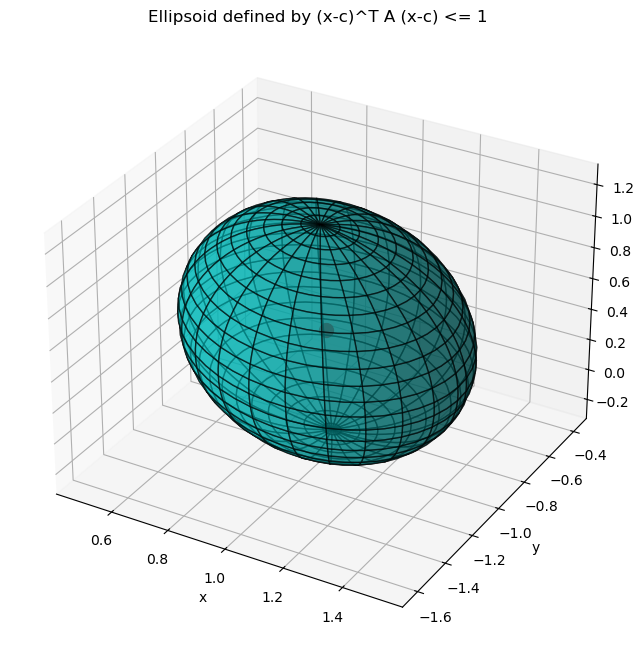

In [3]:
# Generate points on unit sphere
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones_like(u), np.cos(v))

sphere_points = np.stack([x, y, z], axis=-1)  # shape (50,50,3)

# Transformation for ellipsoid:
# Ellipsoid = { c + A^{-1/2} * s : ||s|| ≤ 1 }
# Compute A^{-1/2}
A_inv_sqrt = eigvecs @ np.diag(1 / np.sqrt(eigvals)) @ eigvecs.T

# Apply transformation
ellipsoid_points = np.tensordot(sphere_points, A_inv_sqrt.T, axes=1) + c

# Extract coordinates
X = ellipsoid_points[..., 0]
Y = ellipsoid_points[..., 1]
Z = ellipsoid_points[..., 2]

# Plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, color="c", alpha=0.6, edgecolor="k")

# Plot center
ax.scatter(c[0], c[1], c[2], color="r", s=100)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Ellipsoid defined by (x-c)^T A (x-c) <= 1")

plt.show()